# Analyze Product Sentiment


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read product review data

In [2]:
products =pd.read_csv('amazon_baby.csv')

# Explore data

In [3]:
products

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
products.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
products['name'].nunique()

32417

In [7]:
products['name'].unique()

array(['Planetwise Flannel Wipes', 'Planetwise Wipe Pouch',
       'Annas Dream Full Quilt with 2 Shams', ...,
       'Abstract 2 PK Baby / Toddler Training Cup (Pink)',
       'Baby Food Freezer Tray - Bacteria Resistant, BPA and Phthalate Free - FREE Recipe E-book - Silicone Storage Container with Lid for Homemade Baby Food - 9 Easy-Out Portions - Lifetime Guarantee - Purple',
       'Best 2 Pack Baby Car Shade for Kids - Window Shade Baby - Cheapest Baby Sun Shade with Excellent Quality - Great Protection Car Window Shade for Travel, Trips, or Just for Shade - Better Than Britax and Brica - Pop Open Window Shade Cling That Folds to the Size of Your Hand - Twice As Strong As Competitors - Lifetime Money Back Guarantee'],
      dtype=object)

In [8]:
products['name'].value_counts().reset_index(name=('name' ,'counts'))

,index,name
,,counts
0,Vulli Sophie the Giraffe Teether,785
1,"Simple Wishes Hands-Free Breastpump Bra, Pink,...",562
2,Infant Optics DXR-5 2.4 GHz Digital Video Baby...,561
3,Baby Einstein Take Along Tunes,547
4,"Cloud b Twilight Constellation Night Light, Tu...",520
...,...,...
32412,"Mud Pie First Christmas Ornament, Pink",1
32413,Carter's Yellow Ducky Infant Sleepbag,1
32414,Beco Gemini Baby Carrier - Serenity Black,1


# Perform text cleaning

In [9]:
products = products.fillna({'review':''})  # fill in N/A's in the review column

In [10]:
products

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [11]:
def remove_punctuation(text):
    import string
    return text.translate(str.maketrans('','',string.punctuation))

products['review_clean'] = products['review'].apply(remove_punctuation)

In [12]:
products.head(5)

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


# Examine the reivews for the most-reviewed product

In [13]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [14]:
giraffe_reviews

,name,review,rating,review_clean
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,He likes chewing on all the parts especially t...
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,My son loves this toy and fits great in the di...
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,There really should be a large warning on the ...
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,All the moms in my moms group got Sophie for t...
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,I was a little skeptical on whether Sophie was...
...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5,My baby loves her Sophie Chew Toy She can chew...
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5,Sophie the Giraffe was a big hit at the baby s...
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5,quick shipping and perfect product I would pur...
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5,My baby who is currently teething love his Sop...


In [15]:
len(giraffe_reviews)

785

In [16]:
giraffe_reviews_count=giraffe_reviews['rating'].value_counts().rename_axis('Rating').to_frame('counts')

In [17]:
giraffe_reviews_count

,counts
Rating,
5,535
4,95
3,62
1,56
2,37


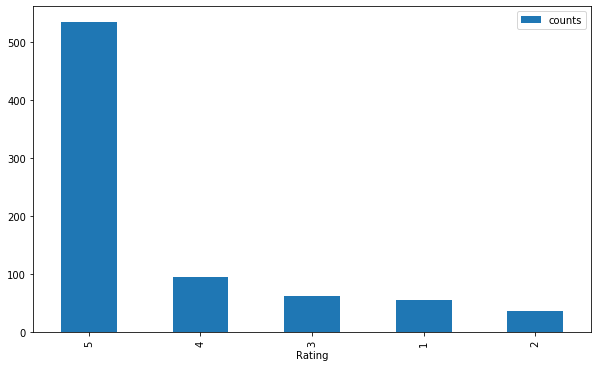

In [18]:
giraffe_reviews_count.plot(kind='bar', figsize=(10, 6))
plt.show()

# Building a sentiment classifier

## Build word count vectors

In [19]:
from collections import Counter

In [20]:
#products['word_count']= [Counter(x) for x in products['review_clean'].str.split()]
products['word_count']= products['review_clean'].str.split().apply(Counter)

In [21]:
products

,name,review,rating,review_clean,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."
...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,Such a great idea very handy to have and look ...,"{'Such': 1, 'a': 1, 'great': 2, 'idea': 1, 've..."
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,This product rocks It is a great blend of fun...,"{'This': 1, 'product': 2, 'rocks': 1, 'It': 1,..."
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,This item looks great and cool for my kidsI kn...,"{'This': 1, 'item': 1, 'looks': 1, 'great': 2,..."
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,I am extremely happy with this product I have ...,"{'I': 9, 'am': 2, 'extremely': 1, 'happy': 1, ..."


# Define what is positive and negative sentiment

In [22]:
products_count = products['rating'].value_counts().rename_axis('Rating').to_frame('counts')
products_count

,counts
Rating,
5,107054
4,33205
3,16779
1,15183
2,11310


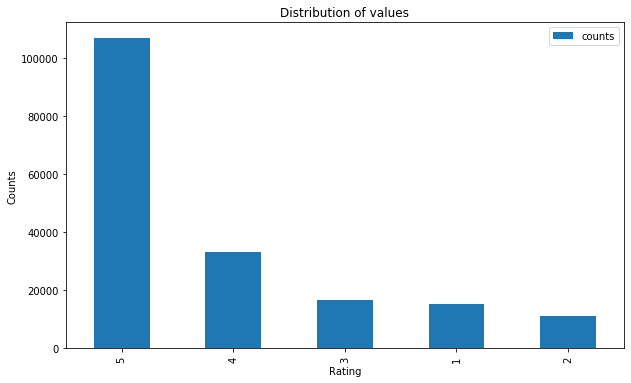

In [23]:
products_count.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Rating') # add to x-label to the plot
plt.ylabel('Counts') # add y-label to the plot
plt.title('Distribution of values')

plt.show()

In [24]:
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [25]:
products

,name,review,rating,review_clean,word_count,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ...",-1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1
...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,Such a great idea very handy to have and look ...,"{'Such': 1, 'a': 1, 'great': 2, 'idea': 1, 've...",1
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,This product rocks It is a great blend of fun...,"{'This': 1, 'product': 2, 'rocks': 1, 'It': 1,...",1
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,This item looks great and cool for my kidsI kn...,"{'This': 1, 'item': 1, 'looks': 1, 'great': 2,...",1
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,I am extremely happy with this product I have ...,"{'I': 9, 'am': 2, 'extremely': 1, 'happy': 1, ...",1


In [26]:
products_sentiment = products['sentiment'].value_counts().rename_axis('sentiment').to_frame('counts')
products_sentiment

,counts
sentiment,
1,140259
-1,43272


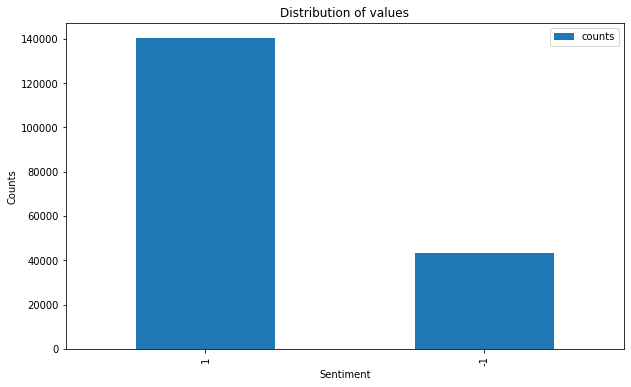

In [27]:
products_sentiment.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Sentiment') # add to x-label to the plot
plt.ylabel('Counts') # add y-label to the plot
plt.title('Distribution of values')

plt.show()

# Train our sentiment classifier

## Split into training and test sets

In [54]:
from sklearn.model_selection import train_test_split
X = products['review_clean']
y = products['sentiment']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [56]:
X_train

104722                                                     
52903     My daughter is very picky about pacifiers thes...
62084     Bought this for my 3 dogs poop bags  It is so ...
64726     We bought this in 2009 in anticipation of Baby...
77833     It doesnt stay on tightly  My one year keep ta...
                                ...                        
152315    What a wonderful way to wash the hair of my da...
176963    My 4 year old picked this out for my infant so...
117952    The labels are great so far I applied them to ...
173685    She have a lot of fun but this one takes a lot...
43567     Its so much fun to watch my now 2 month old fo...
Name: review_clean, Length: 146824, dtype: object

In [57]:
X_test

15833     My 3monthold immediately took to this toy and ...
18455     I really like these cube trays It is a little ...
16827     This travel potty is one of my best buys ever ...
85217     My 2 12yr old has primarily outgrown chewing y...
135172    My daughter wears this bib and another Velcro ...
                                ...                        
80143     This is one of my best baby purchases I use it...
90173     maybe it is just me  but this didnt work for m...
172955    I dont think its fair to give this a bad revie...
91503     I bought these for the nursery for our little ...
8004      The only good thing about this mobile is that ...
Name: review_clean, Length: 36707, dtype: object

In [58]:
y_train

104722    1
52903     1
62084     1
64726     1
77833    -1
         ..
152315    1
176963    1
117952    1
173685   -1
43567     1
Name: sentiment, Length: 146824, dtype: int64

In [59]:
y_test

15833     1
18455     1
16827     1
85217    -1
135172    1
         ..
80143     1
90173    -1
172955    1
91503     1
8004     -1
Name: sentiment, Length: 36707, dtype: int64

# Build the word count vector for each review

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

train_matrix = cv.fit_transform(X_train)

test_matrix = cv.transform(X_test)

In [77]:
train_matrix

<146824x131478 sparse matrix of type '<class 'numpy.int64'>'
	with 7883255 stored elements in Compressed Sparse Row format>

In [76]:
test_matrix

<36707x131478 sparse matrix of type '<class 'numpy.int64'>'
	with 1960733 stored elements in Compressed Sparse Row format>

In [69]:
print (cv.vocabulary_)

{'my': 75279, 'daughter': 34035, 'is': 61628, 'very': 124686, 'picky': 85872, 'about': 7997, 'pacifiers': 83112, 'these': 115437, 'are': 12549, 'the': 114683, 'only': 80657, 'ones': 80431, 'she': 101860, 'will': 128585, 'take': 113261, 'orderd': 81410, 'pack': 83172, 'and': 11281, 'they': 115598, 'all': 10267, 'came': 23384, 'individually': 59747, 'wrapped': 130108, 'which': 128060, 'was': 126095, 'nice': 76723, 'because': 17147, 'could': 31463, 'just': 63642, 'open': 80928, 'one': 80222, 'at': 13563, 'time': 117066, 'good': 51653, 'price': 89458, 'also': 10721, 'bought': 20506, 'this': 116035, 'for': 48100, 'dogs': 38179, 'poop': 87873, 'bags': 15742, 'it': 61948, 'so': 105588, 'easy': 40529, 'to': 117645, 'use': 123384, 'really': 93664, 'helps': 55834, 'hide': 56252, 'smell': 104963, 'we': 126851, 'keep': 63806, 'in': 59247, 'garage': 50231, 'when': 128004, 'come': 28713, 'back': 15164, 'from': 49255, 'walking': 125557, 'go': 51412, 'right': 97025, 'there': 115243, 'what': 127853, 'd

# Train a sentiment classifier with logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

model = LogisticRegression()

result1 = model.fit(train_matrix, y_train)
result1

/home/dipesh/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred_class = result1.predict(test_matrix)

In [74]:
y_pred_class

array([ 1,  1,  1, ...,  1,  1, -1])

In [63]:
from sklearn import metrics

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(test_matrix, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


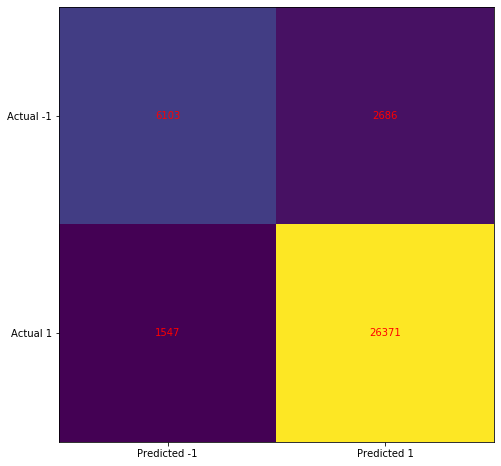

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, result1.predict(test_matrix))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted -1', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual -1', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [65]:
print(classification_report(y_test, result1.predict(test_matrix)))

              precision    recall  f1-score   support

          -1       0.80      0.69      0.74      8789
           1       0.91      0.94      0.93     27918

    accuracy                           0.88     36707
   macro avg       0.85      0.82      0.83     36707
weighted avg       0.88      0.88      0.88     36707



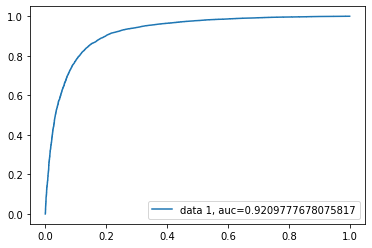

In [82]:
y_pred_proba = result1.predict_proba(test_matrix)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [93]:
y_pred_proba

array([0.9386521 , 0.99423577, 0.99944111, ..., 0.96788206, 0.98205678,
       0.04749535])

# Apply the sentiment classifier to better understand the Giraffe reviews

In [102]:
review_clean1= cv.transform(products['review_clean'])

In [107]:
review_clean1

<183531x131478 sparse matrix of type '<class 'numpy.int64'>'
	with 9843988 stored elements in Compressed Sparse Row format>

In [108]:
products['predicted_sentiment'] = result1.predict_proba(review_clean1)

In [109]:
products

,name,review,rating,review_clean,word_count,sentiment,predicted_sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ...",-1,0.857460
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",1,0.421051
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1,0.047360
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1,0.001008
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1,0.019145
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,Such a great idea very handy to have and look ...,"{'Such': 1, 'a': 1, 'great': 2, 'idea': 1, 've...",1,0.236616
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,This product rocks It is a great blend of fun...,"{'This': 1, 'product': 2, 'rocks': 1, 'It': 1,...",1,0.088340
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,This item looks great and cool for my kidsI kn...,"{'This': 1, 'item': 1, 'looks': 1, 'great': 2,...",1,0.057406
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,I am extremely happy with this product I have ...,"{'I': 9, 'am': 2, 'extremely': 1, 'happy': 1, ...",1,0.000215


In [110]:
products['predicted_sentiment'] = result1.predict_proba(review_clean1)[::,1]

In [111]:
products

,name,review,rating,review_clean,word_count,sentiment,predicted_sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ...",-1,0.142540
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",1,0.578949
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1,0.952640
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1,0.998992
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1,0.980855
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,Such a great idea very handy to have and look ...,"{'Such': 1, 'a': 1, 'great': 2, 'idea': 1, 've...",1,0.763384
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,This product rocks It is a great blend of fun...,"{'This': 1, 'product': 2, 'rocks': 1, 'It': 1,...",1,0.911660
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,This item looks great and cool for my kidsI kn...,"{'This': 1, 'item': 1, 'looks': 1, 'great': 2,...",1,0.942594
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,I am extremely happy with this product I have ...,"{'I': 9, 'am': 2, 'extremely': 1, 'happy': 1, ...",1,0.999785


In [112]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [113]:
giraffe_reviews

,name,review,rating,review_clean,word_count,sentiment,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,He likes chewing on all the parts especially t...,"{'He': 1, 'likes': 1, 'chewing': 1, 'on': 1, '...",1,0.992482
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,My son loves this toy and fits great in the di...,"{'My': 1, 'son': 1, 'loves': 1, 'this': 1, 'to...",1,0.995121
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,There really should be a large warning on the ...,"{'There': 1, 'really': 1, 'should': 1, 'be': 1...",-1,0.254086
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,All the moms in my moms group got Sophie for t...,"{'All': 1, 'the': 2, 'moms': 2, 'in': 1, 'my':...",1,0.952972
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,I was a little skeptical on whether Sophie was...,"{'I': 4, 'was': 2, 'a': 1, 'little': 1, 'skept...",1,0.564806
...,...,...,...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5,My baby loves her Sophie Chew Toy She can chew...,"{'My': 1, 'baby': 1, 'loves': 1, 'her': 1, 'So...",1,0.976161
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5,Sophie the Giraffe was a big hit at the baby s...,"{'Sophie': 1, 'the': 2, 'Giraffe': 1, 'was': 1...",1,0.880048
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5,quick shipping and perfect product I would pur...,"{'quick': 1, 'shipping': 1, 'and': 1, 'perfect...",1,0.997340
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5,My baby who is currently teething love his Sop...,"{'My': 1, 'baby': 1, 'who': 1, 'is': 1, 'curre...",1,0.916685


# Sort the Giraffe reviews according to predicted sentiment

In [115]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

In [116]:
giraffe_reviews

,name,review,rating,review_clean,word_count,sentiment,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,Sophie oh Sophie your time has come My grandda...,"{'Sophie': 16, 'oh': 1, 'your': 1, 'time': 2, ...",1,1.000000e+00
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,My MominLaw bought Sophie for my son when he w...,"{'My': 1, 'MominLaw': 1, 'bought': 1, 'Sophie'...",1,9.999993e-01
34540,Vulli Sophie the Giraffe Teether,Is it worth it? With so many inexpensive teet...,5,Is it worth it With so many inexpensive teeth...,"{'Is': 1, 'it': 8, 'worth': 2, 'With': 2, 'so'...",1,9.999976e-01
34442,Vulli Sophie the Giraffe Teether,"Yes, it's imported. Yes, it's expensive. And y...",5,Yes its imported Yes its expensive And yes I l...,"{'Yes': 2, 'its': 4, 'imported': 1, 'expensive...",1,9.999952e-01
34405,Vulli Sophie the Giraffe Teether,"Yes, we have a back up just in case. I know pa...",5,Yes we have a back up just in case I know pare...,"{'Yes': 1, 'we': 3, 'have': 3, 'a': 6, 'back':...",1,9.999949e-01
...,...,...,...,...,...,...,...
34748,Vulli Sophie the Giraffe Teether,"My daughter loves Sophie, but we received her ...",2,My daughter loves Sophie but we received her a...,"{'My': 1, 'daughter': 1, 'loves': 1, 'Sophie':...",-1,5.587630e-04
34732,Vulli Sophie the Giraffe Teether,Received the product and smells like cheap rub...,1,Received the product and smells like cheap rub...,"{'Received': 1, 'the': 1, 'product': 1, 'and':...",-1,1.683933e-04
34824,Vulli Sophie the Giraffe Teether,I got one of these as a showe gift that my bab...,1,I got one of these as a showe gift that my bab...,"{'I': 8, 'got': 1, 'one': 12, 'of': 3, 'these'...",-1,6.898258e-05
34556,Vulli Sophie the Giraffe Teether,"Alright, first off didn't realize this was a s...",2,Alright first off didnt realize this was a squ...,"{'Alright': 1, 'first': 1, 'off': 1, 'didnt': ...",-1,3.973832e-05


## Show the most positive reviews

In [123]:
giraffe_reviews['review'].iloc[0]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [124]:
giraffe_reviews['review'].iloc[1]

'My Mom-in-Law bought Sophie for my son when he was just starting to really chew on things (and we were hearing some pretty scary things about toys not made in the USA). She did some research and came across Sophie and we are so glad that she did! While Sophie doesn\'t come from the USA, we love the fact that she is 100% safe and natural, and my son loves to play with her. I also love how soft Sophie is, my son tends to swing his toys around and when he\'s sitting on my lap I\'m usually in danger of being hit in the face with whatever he\'s holding, needless to say a soft toy is even better in my book! There\'s one last thing I want to comment on, I\'ve read reviews that said that Sophie was a "glorified dog toy" or something to that effect, and I don\'t want to seem rude, but I think they\'re crazy! Yes Sophie does squeak, (which my son didn\'t care about much at first but now he loves) but that\'s about as far as the comparison could go! If you want a quality teething toy for your ch

# Most negative reivews

In [125]:
giraffe_reviews['review'].iloc[-1]

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

In [126]:
giraffe_reviews['review'].iloc[-2]

"Alright, first off didn't realize this was a squeaky toy.  It is high quality but still same construction as a dog toy.  I really wouldn't of gotten it had I known it squeaked, it drives my dog nuts.  I buy a present for my 4 month old that I now got to make sure the dog doesn't get to.  It's not a bad toy but really nothing special and the fact that it is basically a re-purposed dog toy is rather disappointing, no idea how it goes so many good reviews."